In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [2]:
dataset=pd.read_csv('Reliance_bse_close_price.csv')
dataset['Date']=pd.to_datetime(dataset['Date'],infer_datetime_format=True)
index1=dataset

In [36]:
#Converting date to numbers  below

In [3]:
dataset['Date']=pd.to_datetime(dataset['Date'])
dataset['Date']=dataset['Date'].map(dt.datetime.toordinal)

In [4]:
index1=np.array(index1).reshape(-1,1)

In [5]:
from sklearn.model_selection import train_test_split
X=dataset['Date']
y=dataset['Close Price']

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lm=LinearRegression()

In [9]:
lm.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
predictions=lm.predict(np.array(X_test).reshape(-1,1))

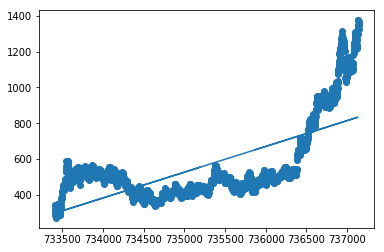

In [11]:
plt.scatter(dataset['Date'],dataset['Close Price'])
plt.plot(X_test,predictions)

In [12]:
#for holts

In [15]:
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline  
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [16]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%B-%Y').strftime('%Y-%m-%d')
df1 = pd.read_csv('Reliance_bse_close_price.csv',parse_dates=['Date'], index_col='Date',date_parser=dateparse)
df1.rename({'Close Price':'Price'},inplace = True,axis =1)
df1 = df1.reindex(index=df1.index[::-1])

In [22]:
train = df1.loc['20090101':'20181231']
test = df1.loc['20190101':'20190329']

In [19]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

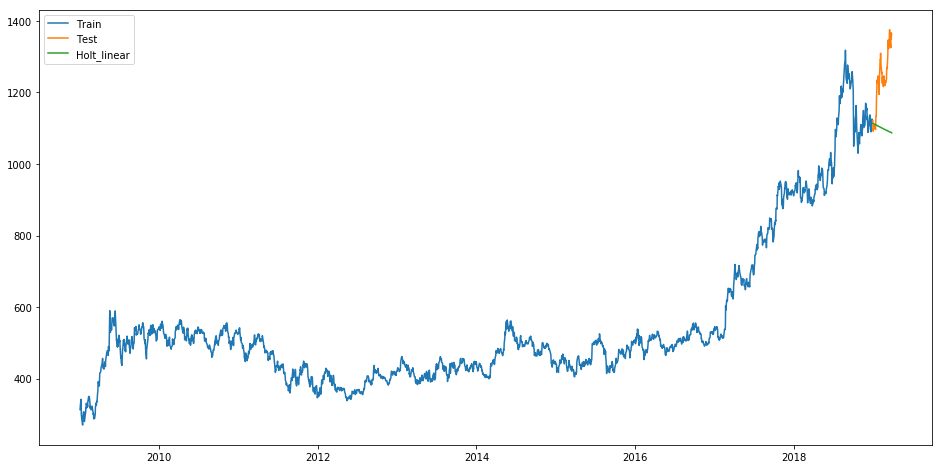

In [24]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Price'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test.Price, y_hat_avg.Holt_linear))
print(rms)

163.48219086188044


In [25]:
#holt winters


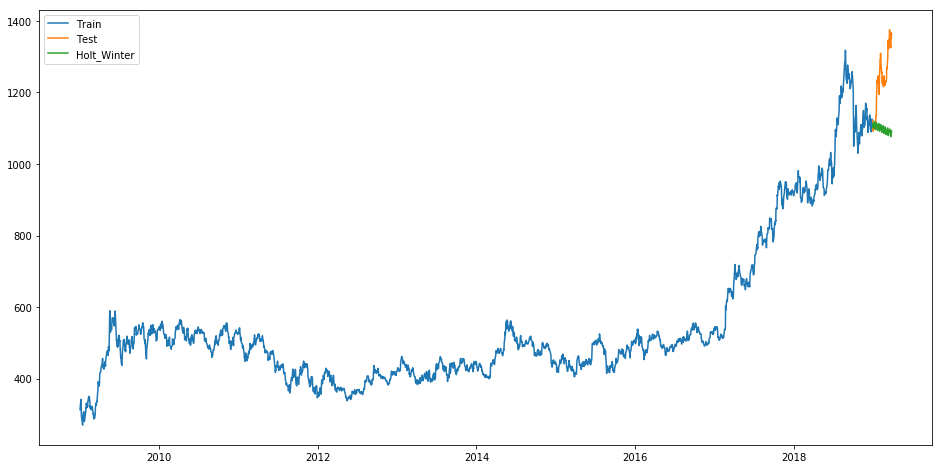

In [28]:
holtw = test.copy()
fit2 = ExponentialSmoothing(np.asarray(train['Price']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
holtw['Holt_Winter'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(holtw['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [30]:
rms1 = sqrt(mean_squared_error(test.Price, holtw.Holt_Winter))
print(rms1)

165.25225004546306


In [32]:
#arima

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


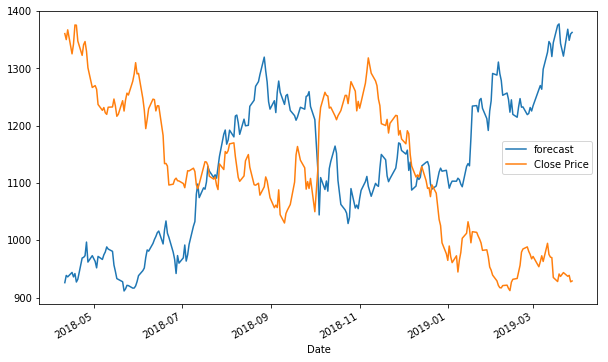

In [35]:


dataset1=pd.read_csv('Reliance_bse_close_price.csv')

dataset1['Date']=pd.to_datetime(dataset1['Date'],infer_datetime_format=True)

indexedDataset=dataset1.set_index(['Date'])

from datetime import datetime

indexedDataset_logscale=np.log(indexedDataset)

from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(indexedDataset,order=(2,1,2))

results_ARIMA= model.fit(disp=-1)

results_ARIMA.plot_predict(1,240)
x=results_ARIMA.forecast(steps=120)